In [88]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib 
from scipy.signal import savgol_filter
import pandas as pd
from scipy.stats import gamma
import ruptures as rpt
from scipy.optimize import curve_fit
import pims
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 19

In [108]:
4.6/15

0.30666666666666664

In [99]:
video2 = pd.read_csv('data/group-trajectories/big_groups/Video 2_GroupsAK/Video2_BG.csv')
ids = video2['Track_ID'].unique()
max_frame = video2['Frame'].max()+1
# frames_cells = pims.open('data/group-trajectories/big_groups/Video 2_GroupsAK/frames/frame_*.png')
# frames_cells[0]
main_tracks = {
    "59": {
        "209": [37, 50],
        "213": [45, 61],
        "215": [71, 81],
        "216": [86, 111],
        "217": [90, 199],
        "222": [174, 199]
    },
    "182": {
        "183": [0, 199],
        "184": [0, 47],
        "200": [0, 115],
        "190": [0, 90],
        "192": [91, 113],
        "236": [179, 195]
    },
    "52": {
        "227": [0, 15],
        "237": [0, 14],
        "239": [0, 15],
        "223": [24, 138],
        "231": [26, 130],
        "232": [103, 137],
        "233": [103, 137],
        "234": [103, 137],
        "243": [103, 137]
    }
}
main_tracks_ids = np.array(list(main_tracks.keys()),dtype=int)       

In [54]:
def save_trajectory_frames(df, ids, t0,N, frames,save_file_template):
    pairs = [(list(), list()) for _ in range(len(ids))]
    x1, y1 = zip(*pairs)
    fig, ax = plt.subplots(figsize=(10,10))

    for frame in range(t0,N):
        ax.clear()
        ax.imshow(frames[frame],cmap='gray',alpha=0.75,origin='lower')
        for i, id in enumerate(ids):
            traj = df[df['Track_ID'] == id].sort_values('Frame')
            all_frames = traj['Frame'].values
            
            first_frame = min(all_frames)
            # print(f'frame {frame}, first {first_frame}')
            # print(id)
            if (frame < traj.values.shape[0]) and (first_frame <= frame) and (frame in all_frames):
                X = traj[traj['Frame'] == frame]['X (micron)'].values[0]
                
                Y = traj[traj['Frame'] == frame]['Y (micron)'].values[0]
                x1[i].append(X*4.8309)
                y1[i].append(Y*4.8309)
                ax.annotate(f'id {int(id)}',xy=(x1[i][-1],y1[i][-1]),fontsize=15,color='white')


            ax.plot(x1[i],y1[i],marker='o', mfc='none',ms=0, lw=1.4)

        ax.set_xlabel('x (px)')
        ax.set_ylabel('y (px)')
        ax.set_title(f'frame {frame}',fontsize=15,loc='left')
        

        plt.savefig(f'{save_file_template}/frame2_{frame:03d}.png', dpi=200,bbox_inches='tight')

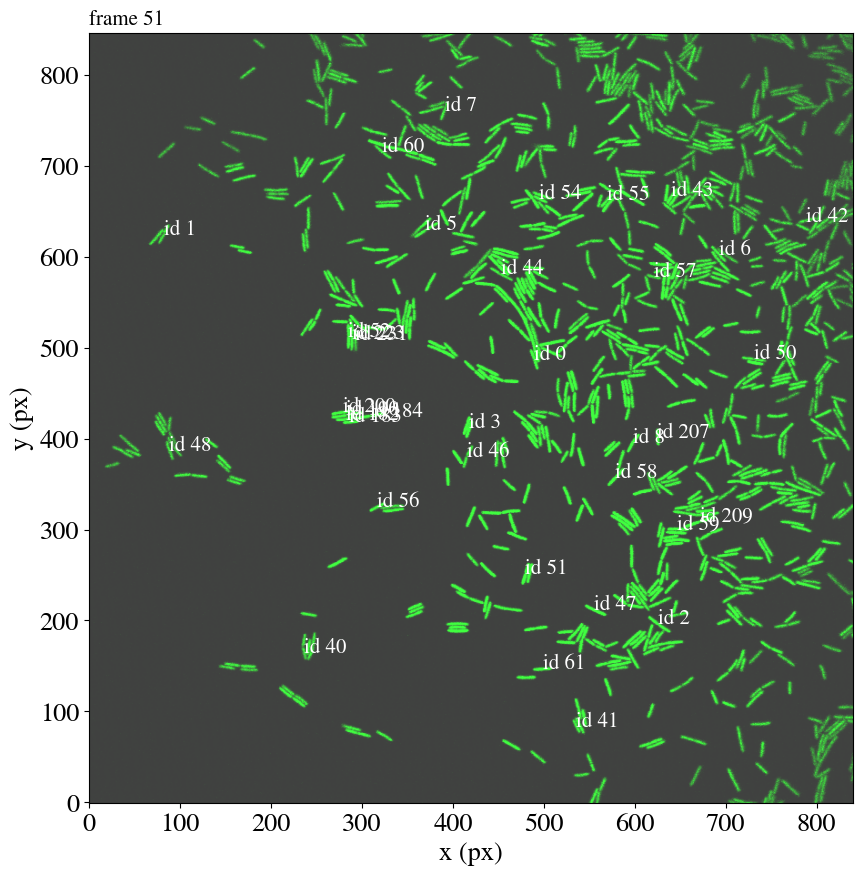

In [62]:
save_trajectory_frames(video2,ids,51,52,frames_cells,save_file_template='data/group-trajectories/big_groups/Video 2_GroupsAK/frames')

In [100]:
video2["is main track"] = video2["Track_ID"].astype(str).isin(main_tracks.keys())
video2["which main track id"] = pd.Series("", dtype="object")
video2["frame range"] = pd.Series("", dtype="object")

for main_id, group in main_tracks.items():
    for track_id, frame_range in group.items():
        mask = (video2["Track_ID"].astype(str) == track_id) & \
               (video2["Frame"] >= frame_range[0]) & \
               (video2["Frame"] <= frame_range[1])
        
        frame_range_str = f"{frame_range[0]}-{frame_range[1]}"
        video2.loc[mask, "which main track id"] = main_id
        video2.loc[mask, "frame range"] = frame_range_str


In [101]:
video2[video2["Track_ID"]==213]

,Spot ID,Track_ID,X (micron),Y (micron),T (sec),Frame,is main track,which main track id,frame range
6637,1211081,213,135.90,61.38,149.89,45,False,59,45-61
6638,1211084,213,134.93,61.51,153.22,46,False,59,45-61
6639,1211086,213,134.93,61.86,156.55,47,False,59,45-61
6640,1211088,213,135.90,61.72,159.88,48,False,59,45-61
6641,1211090,213,135.76,61.72,163.21,49,False,59,45-61
6642,1211092,213,134.45,61.65,166.54,50,False,59,45-61
6643,1211094,213,133.55,61.38,169.87,51,False,59,45-61
6644,1211096,213,133.00,61.03,173.21,52,False,59,45-61
6645,1211098,213,132.86,60.69,176.54,53,False,59,45-61
6646,1211100,213,132.72,60.82,179.87,54,False,59,45-61


In [105]:
# video2.to_csv('data/group-trajectories/big_groups/Video 2_GroupsAK/video2_BG_v2.csv')
video2_v2 = pd.read_csv('data/group-trajectories/big_groups/Video 2_GroupsAK/video2_BG_v2.csv',index_col=0)
video2_v2[video2_v2["Track_ID"]==213]

,Spot ID,Track_ID,X (micron),Y (micron),T (sec),Frame,is main track,which main track id,frame range
6637,1211081,213,135.90,61.38,149.89,45,False,59.0,45-61
6638,1211084,213,134.93,61.51,153.22,46,False,59.0,45-61
6639,1211086,213,134.93,61.86,156.55,47,False,59.0,45-61
6640,1211088,213,135.90,61.72,159.88,48,False,59.0,45-61
6641,1211090,213,135.76,61.72,163.21,49,False,59.0,45-61
6642,1211092,213,134.45,61.65,166.54,50,False,59.0,45-61
6643,1211094,213,133.55,61.38,169.87,51,False,59.0,45-61
6644,1211096,213,133.00,61.03,173.21,52,False,59.0,45-61
6645,1211098,213,132.86,60.69,176.54,53,False,59.0,45-61
6646,1211100,213,132.72,60.82,179.87,54,False,59.0,45-61
